https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/ <br>
https://www.hackerearth.com/practice/machine-learning/data-manipulation-visualisation-r-python/tutorial-data-manipulation-numpy-pandas-python/tutorial/

#### Exploratory Analysis using iris dataset

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data_dir = "dataset"
os.listdir(os.getcwd()+os.sep+data_dir)

['housing.data.txt', 'iris.csv', 'iris.data.txt']

In [4]:
df = pd.read_csv(data_dir+os.sep+"iris.data.txt", header=None)

### Explore dataset

```
type(df)
df.shape
df.columns
df.head(n=10)
df.tail()
df.info() # df.columns, df.count(), df.dtypes
df.isnull().sum(axis=0) # how many null-entries
```

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape # dataset have 150 samples/rows, 5 features/columns

(150, 5)

In [7]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

#### changing column names

In [8]:
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] + ["target"]
df.columns = feature_names

In [9]:
df.head() # first 5 samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.tail(n=7) # last seven samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.iloc[70:75, :] # note that 75 is not included. last index is inclusive

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
70,5.9,3.2,4.8,1.8,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
73,6.1,2.8,4.7,1.2,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor


In [12]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [13]:
df.iloc[0:3, 0:6] # iloc is integer based indexing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [14]:
df.loc[[30, 90, 102, 170], ["sepal length (cm)", "target"]] # with loc you have to index by name, note 170 doesn't exist

C:\Users\hisahoo.ISC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,sepal length (cm),target
30,4.8,Iris-setosa
90,5.5,Iris-versicolor
102,7.1,Iris-virginica
170,NaN,NaN


In [15]:
#df.iloc[[30, 90, 102, 170], 0:6] # 170 is out of bound, will give error
#df.iloc[[30, 90, 102], 0:6]
df.iloc[[30, 90, 102], [0, 2, 4]]

,sepal length (cm),petal length (cm),target
30,4.8,1.6,Iris-setosa
90,5.5,4.4,Iris-versicolor
102,7.1,5.9,Iris-virginica


```
df.info()
df.columns
df.count()
df.dtypes
df.isnull().sum(axis=0) # how many null-entries
```

In [59]:
# get feature index number from df.columns
[df.columns.get_loc(c) for c in ["target", "me", 'sepal width (cm)'] if c in df.columns]

[4, 1]

In [63]:
#df.columns.get_loc("me") # keyError me

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [17]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [18]:
df.count() # it is telling 150 non-null entries

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

In [19]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

In [20]:
df.isnull().sum(axis=0) # how many null entries
# df.isnull() gives each entry of null or not. sum them, column-wise

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [21]:
df.notnull().sum(axis=0) # how many non-null entries

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

### Summary Statistics

In [22]:
df.describe().T # take the transpose, so you will get row-wise

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


```
df.describe().T
df.count()
df.mean()
df.std()
df.min()
df.quantile(q=0.25)
df.quantile(q=0.5)
df.quantile(q=0.75)
df.max()
```

In [23]:
#df.count()

In [24]:
#df.mean()

In [25]:
#df.std()

In [26]:
#df.min()

In [27]:
#df.max()

In [28]:
#df.quantile(q=0.5)
#df.quantile(q=0.25)
df.quantile(q=0.75)

sepal length (cm)    6.4
sepal width (cm)     3.3
petal length (cm)    5.1
petal width (cm)     1.8
Name: 0.75, dtype: float64

#### Explore target feature

In [29]:
target = df["target"]

In [30]:
type(target) # feature type is pandas series

pandas.core.series.Series

In [31]:
target.dtype # datatype is object, categorical feature

dtype('O')

In [32]:
target.unique()
np.unique(target) # how many unique categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<b> please note in the dataset categories in this order : setosa, versicolor, virginica </b>

In [33]:
len(np.unique(df["target"]))

3

In [34]:
df["target"].count() # this is total counts

150

In [35]:
df["target"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: target, dtype: int64

In [36]:
#print('Labels counts in y:', np.bincount(df["target"])) # this will work if you will encode the labels

```
TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'
```

In [64]:
df["target"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: target, dtype: object

In [65]:
df["target"].count()

150

In [67]:
len(df["target"].unique())

3

In [76]:
df["target"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: target, dtype: int64

In [81]:
(df["target"].value_counts().index, df["target"].value_counts().values)

(Index(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype='object'),
 array([50, 50, 50], dtype=int64))

In [72]:
type(df["target"].value_counts()[[0]])

pandas.core.series.Series

In [73]:
df["target"].value_counts()[[0]]

Iris-setosa    50
Name: target, dtype: int64

In [74]:
type(df["target"].value_counts()[0])

numpy.int64

In [75]:
df["target"].value_counts()[0]

50

### Label Encoder : convert to numeric labels

In [37]:
le = LabelEncoder() # le stand for Label Encoder
df["target2"] = le.fit_transform(df.iloc[:, 4]) # you need iloc here, because 4 is not a feature name

In [38]:
df.iloc[[30, 70, 120], :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
30,4.8,3.1,1.6,0.2,Iris-setosa,0
70,5.9,3.2,4.8,1.8,Iris-versicolor,1
120,6.9,3.2,5.7,2.3,Iris-virginica,2


In [39]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
np.unique(df["target2"])

array([0, 1, 2])

In [41]:
np.bincount(df["target2"]) # see bincount works now, it is converted into numeric labels

array([50, 50, 50], dtype=int64)

In [42]:
df["target2"].value_counts()

2    50
1    50
0    50
Name: target2, dtype: int64

In [43]:
class_mapping1 = {label:idx for idx,label in enumerate(np.unique(df["target"]))}
class_mapping1

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#### Data filtering

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
target2,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


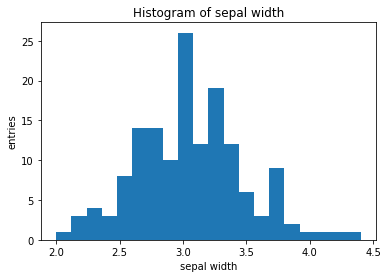

In [45]:
#var = df.loc[:, "sepal width (cm)"]
var = df["sepal width (cm)"]
plt.hist(var, bins=20)
plt.title("Histogram of sepal width")
plt.xlabel("sepal width")
plt.ylabel("entries")
plt.show()

In [46]:
df["sepal width (cm)"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [47]:
df[df["sepal width (cm)"]>3.0].shape # 67 entries

(67, 6)

In [48]:
df[ df["sepal width (cm)"]>3.0 ].iloc[:, 0:5 ] # filter rows, where sepal width>3.0
df[ df["sepal width (cm)"]>3.0 ].loc[:, ["sepal length (cm)", "target", "target2"]].shape # loc is by feature names

(67, 3)

In [49]:
df[df.target=="Iris-setosa"].shape

(50, 6)

#### multiple filtering criteria

In [50]:
df[ (df.target=="Iris-setosa") | (df.target=="Iris-virginica") ].shape # gives 100 rows, use loc

(100, 6)

In [51]:
#df.loc[ (df.target=="Iris-setosa") | (df.target=="Iris-virginica") ]
df.loc[ (df.target=="Iris-setosa") | (df.target=="Iris-virginica"), ["petal width (cm)", "target2"] ].shape

(100, 2)

In [52]:
#df[ df["sepal width (cm)"]>3.0 ].loc[:, "sepal length (cm)"] = np.nan 
# this will not work. use always .loc[row_index, col_index]

```
C:\Users\hisahoo.ISC\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
```

https://chrisalbon.com/python/data_wrangling/pandas_missing_data/ <br>
https://www.ritchieng.com/pandas-selecting-multiple-rows-and-columns/

In [53]:
#df[df["sepal width (cm)"]>3.0] # 67 rows selected
#df.loc[:, "sepal width (cm)"] # select all rows of this column
#df.loc[df["sepal width (cm)"]>3.0] # this works

In [54]:
# repace entries where sepal width > 3.0 with np.nan
df.loc[ df["sepal width (cm)"]>3.0, "sepal length (cm)" ] = np.nan

In [55]:
df.loc[:, "sepal length (cm)"].isnull().sum() # see 67 entries are nan

67

In [56]:
# replace target2 for 0, 2 with nan
df.loc[ (df.target2==0) | (df.target2==2), "target2"] = np.nan

In [57]:
df["target2"].isnull().sum() # 100 entries are NAN

100